In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def parse_file(lines):
    data = [parse_line(line, idx) for idx, line in enumerate(lines) if line.strip()]
    return pd.DataFrame(data)

In [3]:
def parse_line(line, idx):
    if line.startswith("Iteration"):
        parts = line.split(":")
        iteration = int(parts[1].replace(" ", ""))
        time = int(parts[2].split(" ")[1])
        
        return {
            'iteration': iteration,
            'time': time
        }
    
    parts = line.split(":")
    service = parts[0].strip()
    metrics = parts[1].split("|")
    
    cpu = float(metrics[0].split(" ")[2].replace("%", ""))
    
    mem_used = metrics[1].split(" ")[2]
    mem_total = metrics[1].split(" ")[4]
    net_used = metrics[2].split(" ")[2]
    net_total = metrics[2].split(" ")[4]
    block = metrics[3].split(" ")[2]
    
    mem_used_bytes = convert_to_bytes(mem_used)
    mem_total_bytes = convert_to_bytes(mem_total)
    net_used_bytes = convert_to_bytes(net_used)
    net_total_bytes = convert_to_bytes(net_total)
    block_bytes = convert_to_bytes(block)
    
    mem_used_mb = mem_used_bytes / (1000 * 1000)
    mem_total_mb = mem_total_bytes / (1000 * 1000)
    
    return {
        'unit': idx,
        'service': service,
        'cpu': cpu,
        'mem_used': mem_used_mb,
        'mem_total': mem_total_mb,
        'net_used': net_used_bytes,
        'net_total': net_total_bytes,
        'block_used': net_used_bytes,
        'block_total': block_bytes
    }

In [4]:
def convert_to_bytes(value: str) -> int:
    units = {
        'B': 1,
        'kB': 1000,
        'MB': 1000 * 1000,
        'MiB': 1024 * 1024,
        'GB': 1000 * 1000 * 1000,
        'GiB': 1024 * 1024 * 1024,
        'KiB': 1024,
    }
    match = re.match(r"([\d.]+)([A-Za-z]+)", value.strip())
    if match:
        number = float(match.group(1))
        unit = match.group(2)
        return int(number * units[unit])
    return 0

In [5]:
def calculate_aggregates(df):
    grouped = df.groupby('service')

    aggregates = []

    for service, group in grouped:
        max_cpu = group['cpu'].max()
        max_mem = group['mem_used'].max()
        avg_cpu = group['cpu'].mean()
        avg_mem = group['mem_used'].mean()
        avg_net = group['net_used'].mean()
        avg_block = group['block_used'].mean()

        aggregates.append({
            'Service': service,
            'Avg CPU (%)': avg_cpu,
            'Max CPU (%)': max_cpu,
            'Avg Mem (MB)': avg_mem,
            'Max Mem (MB)': max_mem,
            'Avg Net (kB)': avg_net,
            'Avg Block (B)': avg_block
        })

    return pd.DataFrame(aggregates)

In [6]:
def print_time_results(df):
    iteration_rows = df[df['iteration'].notnull()]
    
    if iteration_rows.empty:
        print("No iteration data found.")
        return

    iteration_times = iteration_rows['time'].tolist()
    avg_time = sum(iteration_times) / len(iteration_times)

    headers = [f"Iteration {i}" for i in range(1, len(iteration_times) + 1)] + ["Average"]
    values = iteration_times + [f"{avg_time:.2f}"]

    col_width = max(len(header) for header in headers) + 2
    formatted_headers = " | ".join(header.ljust(col_width) for header in headers)
    formatted_values = " | ".join(str(value).ljust(col_width) for value in values)

    print(formatted_headers)
    print(formatted_values)

In [7]:
def plot_metrics_over_time(df):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['cpu'], label=service)
    plt.title('CPU Usage (%) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('CPU (%)')
    plt.legend()

    plt.subplot(2, 2, 2)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['mem_used'], label=service)
    plt.title('Memory Usage (MB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Memory (MB)')
    plt.legend()

    plt.subplot(2, 2, 3)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['net_used'], label=service)
    plt.title('Network Usage (kB) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Network (kB)')
    plt.legend()

    plt.subplot(2, 2, 4)
    for service in df['service'].unique():
        service_df = df[df['service'] == service]
        plt.plot(service_df['unit'], service_df['block_used'], label=service)
    plt.title('Block Usage (B) Over Time')
    plt.xlabel('Time (Unit)')
    plt.ylabel('Block (B)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [8]:
# TODO: Change this to the directory where the results are stored
results_dir = "results-01"

In [9]:
preprocessing = "preprocessing"
_import = "import"
largestNumberOfChildren = "largestNumberOfChildren"
neighborhoodPopularity = "neighborhoodPopularity"
shortestPathPopularity = "shortestPathPopularity"
directPathWithHighPopularity = "directPathWithHighPopularity"

In [10]:
# TODO: Add the files you want to analyze
files = [_import, largestNumberOfChildren, neighborhoodPopularity, shortestPathPopularity, directPathWithHighPopularity]
files = [f"{results_dir}/{file}" for file in files]

Metrics for results-01/import

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     0.000000         0.00      0.390603      1.089470   1335.893720    1335.893720
adv-db-systems.importer    48.768140       275.58   1885.210419   2456.721293   3451.763285    3451.763285
adv-db-systems.memgraph    54.519444       106.96   1001.846600   1940.251475   2798.357488    2798.357488

Iteration 1   | Average      
81091.0       | 81091.00     


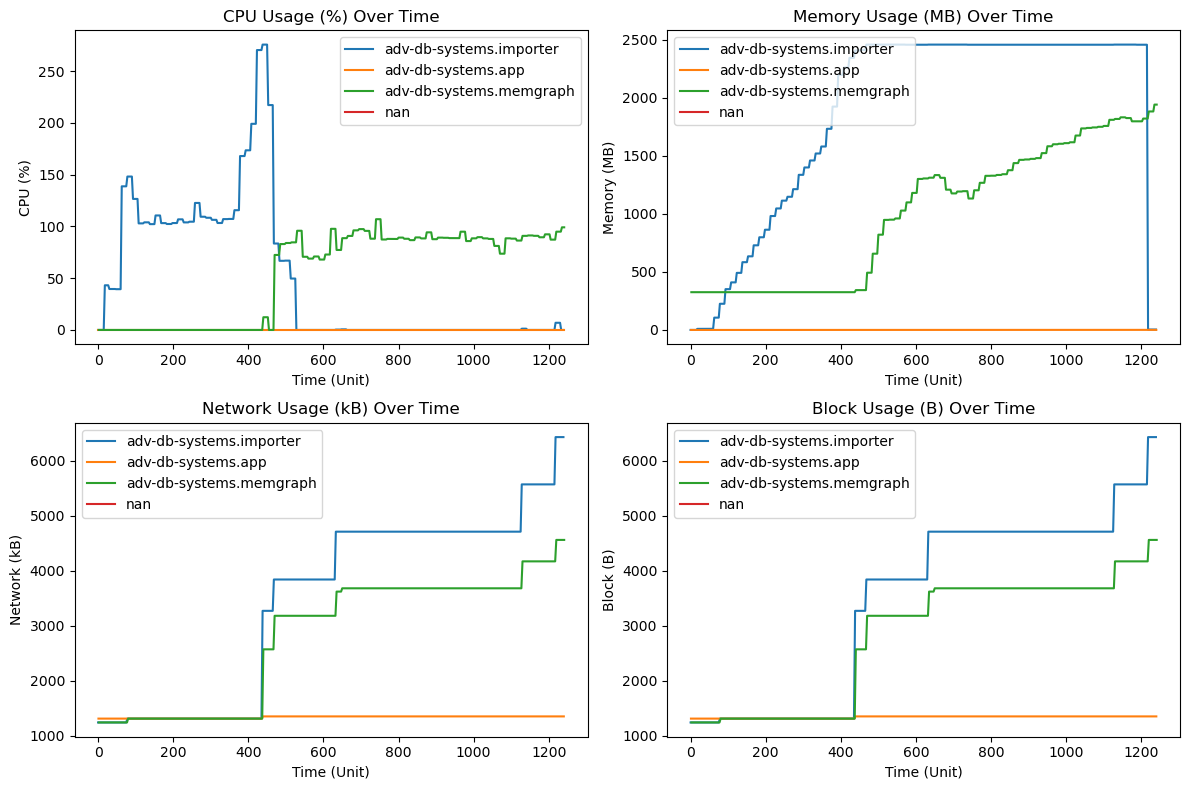

Metrics for results-01/largestNumberOfChildren

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     6.301630        22.79     12.146368     17.951621   6660.815217    6660.815217
adv-db-systems.importer     0.000000         0.00     30.956311     36.144414   6478.097826    6478.097826
adv-db-systems.memgraph    64.920054        98.81   2436.956273   2822.867255   8030.543478    8030.543478

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
5068.0        | 5344.0        | 5162.0        | 5354.0        | 5511.0        | 5287.80      


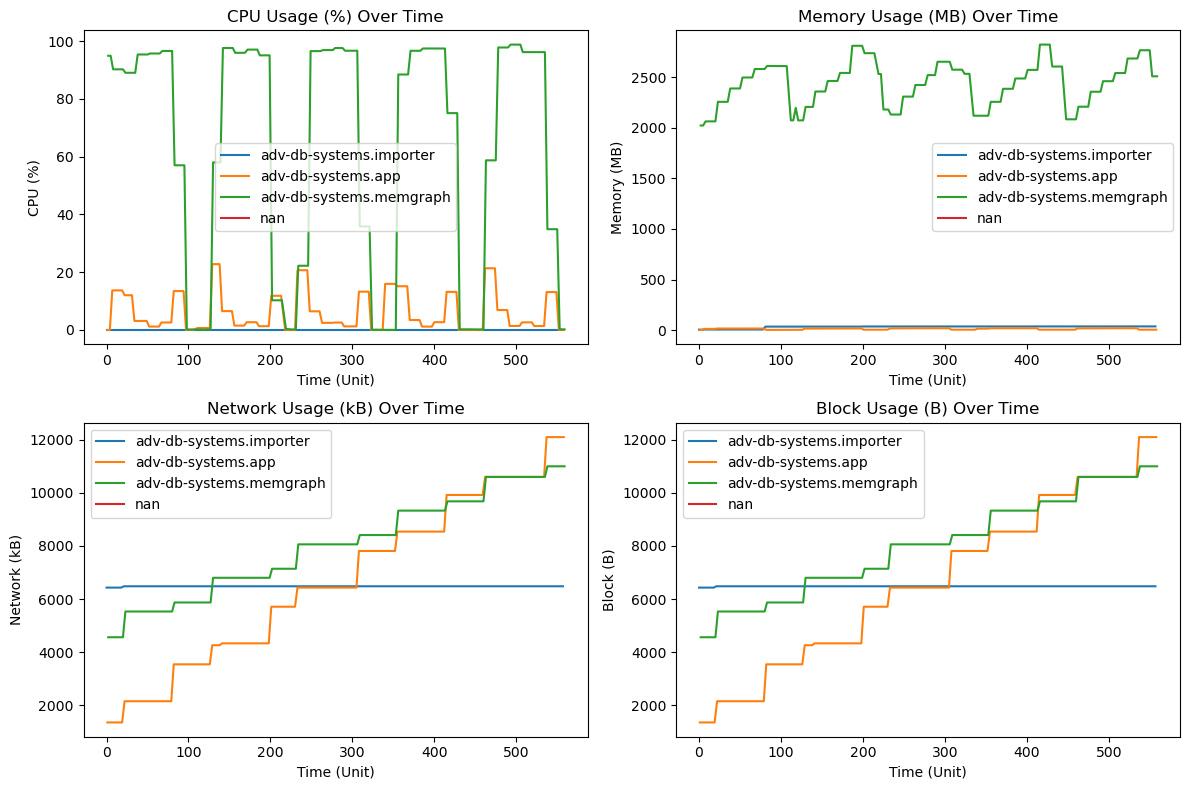

Metrics for results-01/neighborhoodPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app    13.062879        35.55      6.267370     18.727567  16115.151515   16115.151515
adv-db-systems.importer     0.000000         0.00     36.437062     36.647731   6516.060606    6516.060606
adv-db-systems.memgraph     0.278636         2.54   2083.303170   2157.147324  15400.000000   15400.000000

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
529.0         | 601.0         | 565.0         | 630.0         | 559.0         | 576.80       


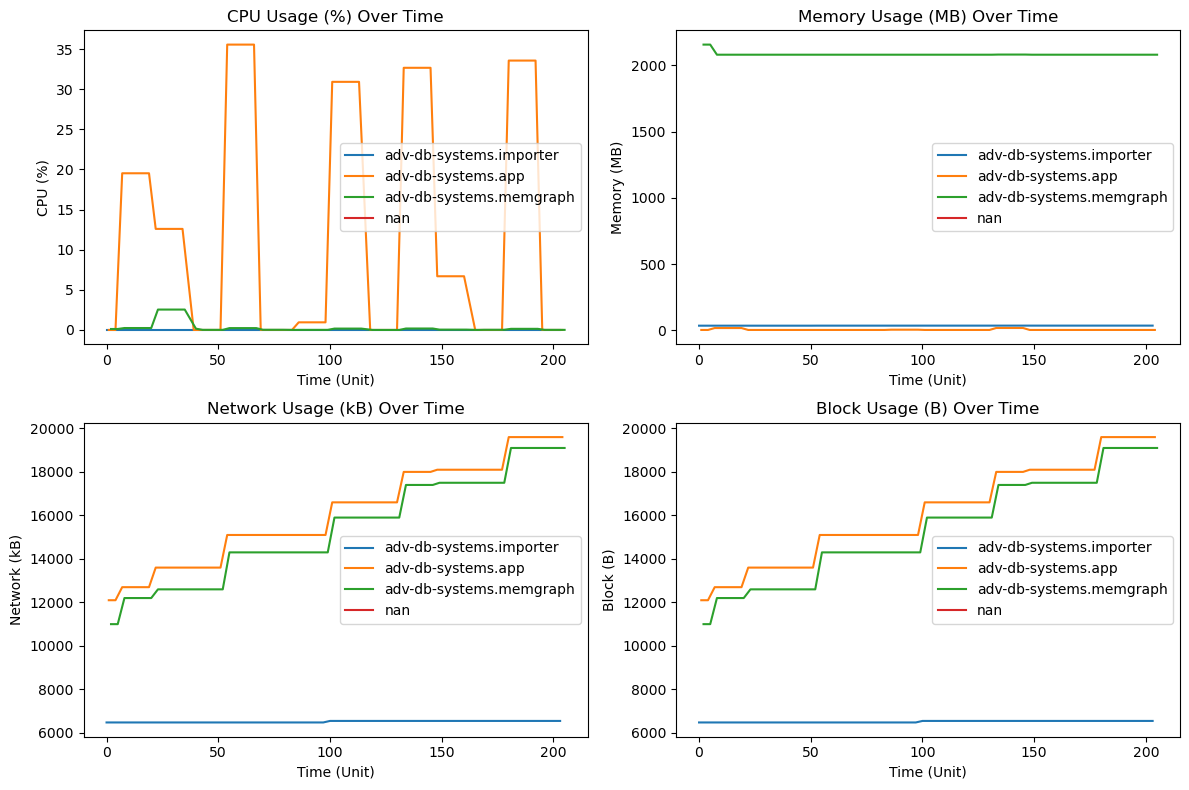

Metrics for results-01/shortestPathPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app    11.568714        32.75      5.499766     15.026094  37364.285714   37364.285714
adv-db-systems.importer     0.000000         0.00     36.772062     36.825989   6550.000000    6550.000000
adv-db-systems.memgraph    44.091000       115.27   2097.033121   2120.640102  23267.142857   23267.142857

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
731.0         | 732.0         | 781.0         | 684.0         | 646.0         | 714.80       


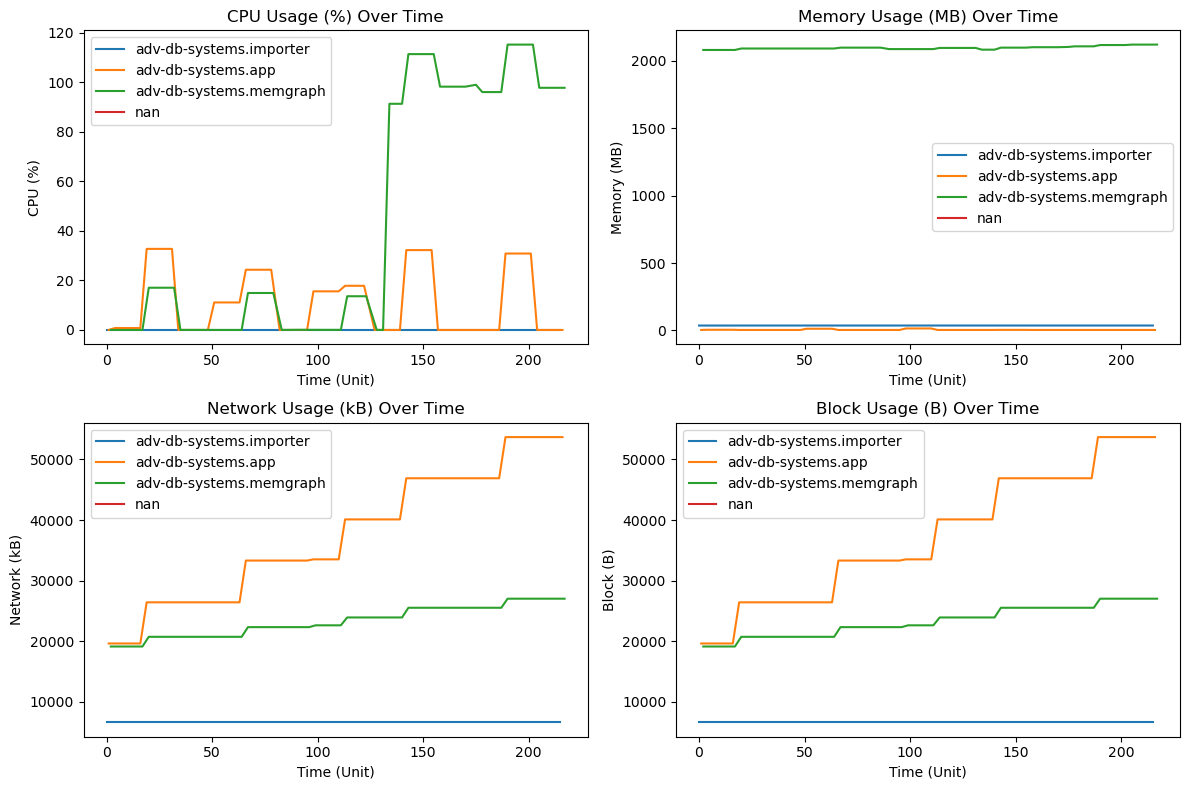

Metrics for results-01/directPathWithHighPopularity

                Service  Avg CPU (%)  Max CPU (%)  Avg Mem (MB)  Max Mem (MB)  Avg Net (kB)  Avg Block (B)
     adv-db-systems.app     6.028142        25.38     13.418575     20.017315  86106.557377   86106.557377
adv-db-systems.importer     0.000000         0.00     36.856873     36.909875   6550.000000    6550.000000
adv-db-systems.memgraph    61.281639        98.66   2105.050310   2115.271393  31306.010929   31306.010929

Iteration 1   | Iteration 2   | Iteration 3   | Iteration 4   | Iteration 5   | Average      
5259.0        | 5168.0        | 5310.0        | 5358.0        | 5219.0        | 5262.80      


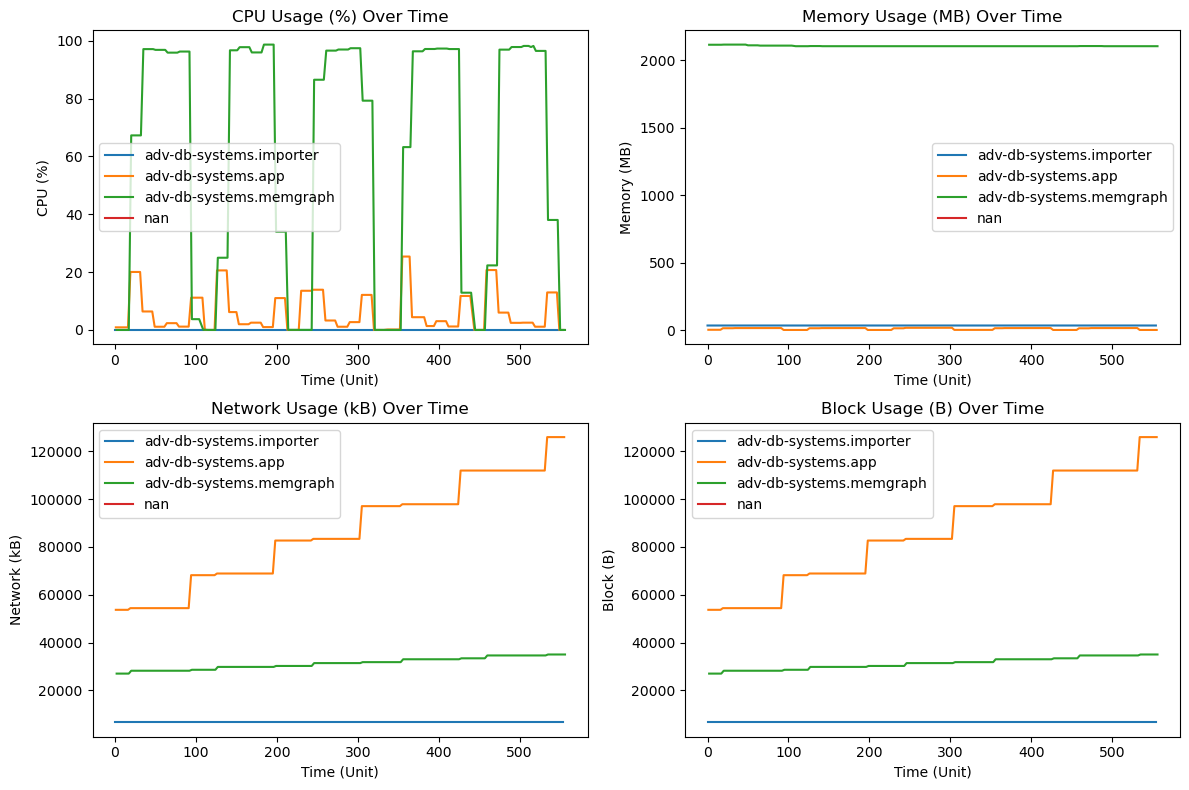

In [11]:
for file in files:
    with open(f"{file}") as f:
        lines = f.readlines()
        df = parse_file(lines)
        
        print(f"Metrics for {file}")
        print()
        
        result_df = calculate_aggregates(df)
        print(result_df.to_string(index=False))
        
        print()
        
        print_time_results(df)
        plot_metrics_over_time(df)